# Homework 6
###### by Mher Movsisyan
---

### Problem 1: Properties of Estimators  
a. (20 points)  
Assume we are given a distribution with a known mean μ. We want to Estimate the Variance
of that Distribution, using the Random Sample
$$ X_1, X_2, \ldots, X_n $$
coming from that Distribution.  
To Estimate the Variance σ<sup>2</sup>, we want to use the Estimator
$$ \hat{\sigma}^2 = \frac{1}{n} \sum_{k=1}^n (X_k - \mu)^2 $$  
1. Calculate the Bias of ̂ σ<sup>2</sup> and deduce if it is Unbiased or not;

$$ E(\hat\sigma^2) = \frac{1}{n} \sum_{k=1}^n E((X_k - \mu)^2) = $$
$$ = \frac {1}{n} \sum_{k=1}^n(Var(X_k - \mu) + E(X_k - \mu)^2) = $$
$$ = \frac {1}{n} \sum_{k=1}^n(Var(X_k)) = Var(X_k) = \sigma^2 $$

Thus, the Bias is 0.

2. Prove that ̂ σ<sup>2</sup> is a Consistent Estimator for σ<sup>2</sup>.

$$ Bias(\hat\sigma^2, \sigma^2) = E(\hat\sigma^2) - \sigma^2 = 0 $$
$$ \Rightarrow \hat\sigma^2 \underset{n \to \infty}{\to} \sigma^2\ \ by\ \ W.L.L.N. $$

3. Prove that $$ \hat{\sigma} = \sqrt{\frac{\sum_{k=1}^n(X_k-\mu)^2}{n}} $$ is a Consistent Estimator for σ

From the proof above, $$ \hat\sigma^2 \underset{n \to \infty}{\to} \sigma^2 \Rightarrow \hat\sigma = \sqrt{\frac{\sum_{k=1}^n(X_k-\mu)^2}{n}} \underset{n \to \infty}{\to} \sigma $$

4. In general, without any additional information, it is not possible to calculate the 
$$ MSE(\hat\sigma^2, σ^2) $$ 
So for this part, assume that 
$$ X_1, X_2, \ldots, X_n \sim \N (\mu, \sigma^2) $$
Calculate the $$ MSE(\hat\sigma^2, σ^2) $$ in this case.
Note: You can use the following property: if X ∼ N(0, σ<sup>2</sup>)
$$ E[X^4] = 3σ^4 $$

The estimator is unbiased, so X<sub>1</sub>, X<sub>2</sub>, ..., X<sub>n</sub> ∼ N(0, σ<sup>2</sup>)
$$ MSE(\hat\sigma^2, \sigma^2) = Var(\hat\sigma^2) = Var(\frac{1}{n} \sum_{k=1}^n (X_k - \mu)^2) = $$
$$ = Var((X_k - \mu)^2) = Var(X_k^2 + 2\mu X_k + \mu^2) = $$
$$ = Var(X_k^2) + 4Cov(X_k^2, X_k) + 4Var(X_k) = $$

$$ = Var(X_k^2) + 4E(X_k)E(X_k^2)E(X_k^3) + 4Var(X_k) = $$

$$ = Var(X_k^2) + 4\sigma^2 \approx 4E(X_k)^2Var(X_k) + 4\sigma^2 = 4\sigma^2 $$

b. (10 points)
Assume we want to Estimate λ in the Exponential Model: we take a Random Sample
$$ X_1, X_2, \ldots, X_n Ex(\lambda) $$
and use the Estimator
$$ \hat{\lambda} = \frac{n}{\sum_{k=1}^n X_k}  $$
to Estimate λ. Show that ˆλ<sub>n</sub> is a Consistent Estimator for λ

$$ \frac{n}{\sum_{k=1}^n X_k} \to \frac {1}{\lambda} = E (X_k) \Rightarrow \hat\lambda\ is\ consistent $$

c. (R, 20 points)  
We want to check the results of the Problem 1b, using R. To see the Consistency,
- Fix some value of λ; this will be the true value of our parameter (for simulations, we assume we know it);
- Take large n;
- Generate a random sample of size n from the Exp(λ) Distribution;
- For each `k = 1, 2, 3, ..., n`, calculate ˆλ<sub>k</sub>, and plot these points on the graph against k, joining the points with lines (use the type = "l" as a parameter in plot command); by this, we want to “see” to what ˆλ<sub>k</sub> is approaching;
- Now, do the 3-rd step several times, and plot on the previous plot, each time using a different color; by this, we want to see that for different observations, the limit will be the same;
- Finally, add a horizontal line `y = λ`, passing through the real value of λ. If your code is running correctly, and n is large, the curves for the values of ˆλ<sub>k</sub> need to approach this line, showing the Consistency of ˆλ<sub>k</sub>.

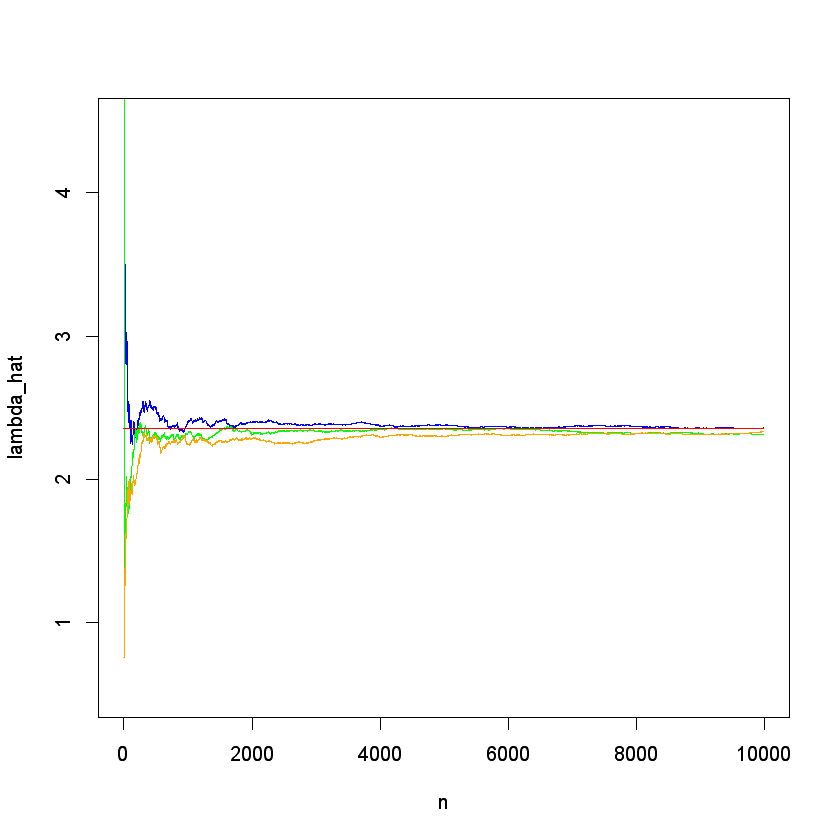

In [24]:
lambda <- 2.3567
n <- 10000
sample <- rexp(n, lambda)
sample_2 <- rexp(n, lambda)
sample_3 <- rexp(n, lambda)

lambda_hat <- function (sample) {
  return (length(sample)/sum(sample))
}

lambda_hats <- vector()

for (i in 0:n) {
    lambda_hats[i] <- lambda_hat(sample[1:i])
}

lambda_hats_2 <- vector()

for (i in 0:n) {
    lambda_hats_2[i] <- lambda_hat(sample_2[1:i])
}

lambda_hats_3 <- vector()

for (i in 0:n) {
    lambda_hats_3[i] <- lambda_hat(sample_3[1:i])
}

plot(c(0:(n-1)), lambda_hats, type = "l", col="blue", xlim=c(0, n-1), ylim=c(0.5, 4.5), xlab="n", ylab="lambda_hat")
par(new=T)
plot(c(0:(n-1)), lambda_hats_2, type = "l", col="green", xlim=c(0, n-1), ylim=c(0.5, 4.5), xlab="n", ylab="lambda_hat")
par(new=T)
plot(c(0:(n-1)), lambda_hats_3, type = "l", col="orange", xlim=c(0, n-1), ylim=c(0.5, 4.5), xlab="n", ylab="lambda_hat")

lines(c(0, (n-1)), c(lambda, lambda), col = "red")